<a href="https://colab.research.google.com/github/eaedk/Machine-Learning-Tutorials/blob/main/tunisian_fraud_detection_in_classification_mode_ML_Step_By_Step_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro
## General
Machine learning allows the user to feed a computer algorithm an immense amount of data and have the computer analyze and make data-driven recommendations and decisions based on only the input data. 
In most of the situations we want to have a machine learning system to make **predictions**, so we have several categories of machine learning tasks depending on the type of prediction needed: **Classification, Regression, Clustering, Generation**, etc.

**Classification** is the task whose goal is the prediction of the label of the class to which the input belongs (e.g., Classification of images in two classes: cats and dogs).
**Regression** is the task whose goal is the prediction of numerical value(s) related to the input (e.g., House rent prediction, Estimated time of arrival ).
**Generation** is the task whose goal is the creation of something new related to the input (e.g., Text translation, Audio beat generation, Image denoising ). **Clustering** is the task of grouping a set of objects in such a way that objects in the same group (called a **cluster**) are more similar (in some sense) to each other than to those in other **clusters** (e.g., Clients clutering).

In machine learning, there are learning paradigms that relate to one aspect of the dataset: **the presence of the label to be predicted**. **Supervised Learning** is the paradigm of learning that is applied when the dataset has the label variables to be predicted, known as ` y variables`. **Unsupervised Learning** is the paradigm of learning that is applied when the dataset has not the label variables to be predicted. **Self-supervised Learning** is the paradigm of learning that is applied when part of the X dataset is considere as the label to be predicted (e.g., the Dataset is made of texts and the model try to predict the next word of each sentence).

## Notebook overview

This notebook is a guide to start practicing Machine Learning.

[Financial Inclusion in Africa Challenge](https://zindi.africa/competitions/financial-inclusion-in-africa/)

# Setup

## Installation
Here is the section to install all the packages/libraries that will be needed to tackle the challlenge.

In [ ]:
!pip install -q -U scikit-learn catboost xgboost lightgbm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 61.4 MB/s eta 0:00:00


In [ ]:
# !pip list

## Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [163]:
# Data handling
import pandas as pd

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import seaborn as sb

# EDA (pandas-profiling, etc. )
...

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, LabelEncoder, Binarizer
from sklearn.compose import ColumnTransformer

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

# from catboost import
# from xgboost import 
# from lightgbm import 

from sklearn.metrics import classification_report, accuracy_score, f1_score

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Other packages
import os, pickle


import warnings
warnings.filterwarnings('ignore')

# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

https://drive.google.com/file/d/10SVy2hoDReZ0_UYM3fw7LwvORxjhdUtT/view?usp=sharing

In [106]:
!gdown "10SVy2hoDReZ0_UYM3fw7LwvORxjhdUtT" 
!unzip -o "tunisian-fraud-detection.zip"

Downloading...
From: https://drive.google.com/uc?id=10SVy2hoDReZ0_UYM3fw7LwvORxjhdUtT
To: /content/tunisian-fraud-detection.zip
100% 2.47M/2.47M [00:00<00:00, 170MB/s]
Archive:  tunisian-fraud-detection.zip
  inflating: tunisian-fraud-detection/VariableDescription.csv  
  inflating: __MACOSX/tunisian-fraud-detection/._VariableDescription.csv  
  inflating: tunisian-fraud-detection/SUPCOM_Test.csv  
  inflating: __MACOSX/tunisian-fraud-detection/._SUPCOM_Test.csv  
  inflating: tunisian-fraud-detection/SUPCOM_SampleSubmission.csv  
  inflating: __MACOSX/tunisian-fraud-detection/._SUPCOM_SampleSubmission.csv  
  inflating: tunisian-fraud-detection/SUPCOM_Train.csv  
  inflating: __MACOSX/tunisian-fraud-detection/._SUPCOM_Train.csv  


In [107]:
# For CSV, use pandas.read_csv
DATASET_DIR = os.path.join(".", 'tunisian-fraud-detection')
train = pd.read_csv(os.path.join(DATASET_DIR, 'SUPCOM_Train.csv'))
test = pd.read_csv(os.path.join(DATASET_DIR, 'SUPCOM_Test.csv'))
ss = pd.read_csv(os.path.join(DATASET_DIR, 'SUPCOM_SampleSubmission.csv'))

# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

In [ ]:
# Code here

In [108]:
pd.read_csv(os.path.join(DATASET_DIR, 'VariableDescription.csv'))

,Libellé,Intitulé,Title
0,Contribuable,NaN,Rate payer
1,BCT_CODBUR,Code Bureau de contrôle des impôts,Code Tax Control Office
2,CTR_MATFIS,ID Contribuable,Rate payer ID
3,CTR_CATEGO_x,Catégorie Contribuable,Rate payer category
4,CTR_CODTVA,Code TVA,Code TVA
...,...,...,...
152,Err:510,NaN,NaN
153,CTR_MATFIS,Matricule fiscal,Tax identification number
154,CTR_ETBSEC,N°Etablissement Secondaire,No. Secondary School
155,RES_MNTRED,Montant Principal Redressement,Main Amount Straightening


In [ ]:
train.head()

,BCT_CODBUR,CTR_MATFIS,CTR_CATEGO_X,FJU_CODFJU,CTR_CESSAT,ACT_CODACT,CTR_OBLDIR,CTR_OBLACP,CTR_OBLRES,CTR_OBLFOP,...,target,FAC_MNTPRI_F,FAC_MFODEC_F,FAC_MNTDCO_F,FAC_MNTTVA_F,FAC_MNTPRI_C,FAC_MFODEC_C,FAC_MNTDCO_C,FAC_MNTTVA_C,id
0,44,6210,C,99,0,3707,4,2,2,2,...,16.639203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id17437
1,401,14383,M,22,0,6105,4,2,2,2,...,17.827703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id5086
2,243,11555,M,23,0,5751,4,2,2,2,...,15.473503,25387000.0,0.0,0.0,4571280.0,NaN,NaN,NaN,NaN,train_id1443
3,72,6175,C,99,0,4402,4,2,2,2,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id15469
4,42,1417,M,23,0,6302,4,2,2,2,...,14.286244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id14368


In [ ]:
test.head()

,BCT_CODBUR,CTR_MATFIS,CTR_CATEGO_X,FJU_CODFJU,CTR_CESSAT,ACT_CODACT,CTR_OBLDIR,CTR_OBLACP,CTR_OBLRES,CTR_OBLFOP,...,RES_ANNIMP,FAC_MNTPRI_F,FAC_MFODEC_F,FAC_MNTDCO_F,FAC_MNTTVA_F,FAC_MNTPRI_C,FAC_MFODEC_C,FAC_MNTDCO_C,FAC_MNTTVA_C,id
0,238,5016,M,22,0,3601,4,2,2,2,...,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,test_id1120
1,173,3757,M,22,0,3912,4,2,2,2,...,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,test_id1680
2,125,15482,C,99,0,4221,4,2,2,1,...,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,test_id1063
3,9,11722,C,99,0,3203,4,2,2,2,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,test_id3731
4,153,6557,P,99,0,6308,4,2,2,2,...,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,test_id9766


In [ ]:
train.describe(include=['O'])

,CTR_CATEGO_X,id
count,21295,21295
unique,4,21295
top,M,train_id17437
freq,10889,1


In [ ]:
train.describe()

,BCT_CODBUR,CTR_MATFIS,FJU_CODFJU,CTR_CESSAT,ACT_CODACT,CTR_OBLDIR,CTR_OBLACP,CTR_OBLRES,CTR_OBLFOP,CTR_OBLTFP,...,RES_ANNIMP,target,FAC_MNTPRI_F,FAC_MFODEC_F,FAC_MNTDCO_F,FAC_MNTTVA_F,FAC_MNTPRI_C,FAC_MFODEC_C,FAC_MNTDCO_C,FAC_MNTTVA_C
count,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,...,21295.000000,21295.000000,1.820000e+03,1.820000e+03,1.820000e+03,1.820000e+03,2.113000e+03,2.113000e+03,2.113000e+03,2.113000e+03
mean,214.935807,7797.448697,59.580888,0.048509,4821.595445,4.454191,1.959850,1.977319,1.928105,1.949096,...,2014.508852,11.780084,9.471275e+09,6.632605e+06,9.306873e+04,4.903870e+08,8.420356e+08,1.489097e+06,3.191820e+04,1.386915e+08
std,162.992837,4484.430937,38.542427,0.228200,1168.628546,1.205500,0.196316,0.154462,0.263361,0.221933,...,1.332947,7.085772,1.297572e+11,2.091579e+08,3.596381e+06,4.739676e+09,4.107717e+09,1.733094e+07,7.106121e+05,7.148914e+08
min,9.000000,1.000000,10.000000,0.000000,1002.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2013.000000,0.000000,2.173000e+04,0.000000e+00,0.000000e+00,0.000000e+00,4.910000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,92.000000,3944.000000,22.000000,0.000000,4203.000000,4.000000,2.000000,2.000000,2.000000,2.000000,...,2013.000000,0.000000,3.024577e+07,0.000000e+00,0.000000e+00,4.360140e+06,1.906574e+07,0.000000e+00,0.000000e+00,2.927028e+06
50%,182.000000,7817.000000,23.000000,0.000000,4417.000000,4.000000,2.000000,2.000000,2.000000,2.000000,...,2014.000000,14.981121,1.997162e+08,0.000000e+00,0.000000e+00,2.989651e+07,5.594731e+07,0.000000e+00,0.000000e+00,8.642968e+06
75%,254.000000,11695.500000,99.000000,0.000000,6102.000000,4.000000,2.000000,2.000000,2.000000,2.000000,...,2015.000000,16.625623,9.257110e+08,0.000000e+00,0.000000e+00,1.426512e+08,2.707424e+08,0.000000e+00,0.000000e+00,4.414594e+07
max,700.000000,15603.000000,99.000000,2.000000,8999.000000,9.000000,2.000000,5.000000,5.000000,3.000000,...,2018.000000,23.591334,3.414507e+12,8.897885e+09,1.529912e+08,1.608777e+11,8.351128e+10,4.044067e+08,2.614500e+07,1.352152e+10


In [ ]:
train.corr()

,BCT_CODBUR,CTR_MATFIS,FJU_CODFJU,CTR_CESSAT,ACT_CODACT,CTR_OBLDIR,CTR_OBLACP,CTR_OBLRES,CTR_OBLFOP,CTR_OBLTFP,...,RES_ANNIMP,target,FAC_MNTPRI_F,FAC_MFODEC_F,FAC_MNTDCO_F,FAC_MNTTVA_F,FAC_MNTPRI_C,FAC_MFODEC_C,FAC_MNTDCO_C,FAC_MNTTVA_C
BCT_CODBUR,1.000000,-0.004560,-0.282052,-0.053797,-0.056135,-0.065210,-0.054917,0.057064,-0.008673,0.020431,...,-0.017049,-0.095951,-0.021640,-0.028657,0.037386,0.034800,0.148758,0.101793,-0.005515,0.145694
CTR_MATFIS,-0.004560,1.000000,-0.008181,0.010832,0.004794,-0.001677,-0.008272,0.012592,-0.008613,-0.000047,...,0.018853,0.001628,0.034445,-0.026270,-0.011549,-0.050911,-0.052384,-0.033117,0.020244,-0.049919
FJU_CODFJU,-0.282052,-0.008181,1.000000,0.080020,0.207189,0.255306,0.181005,-0.150188,0.018161,-0.085055,...,-0.005177,0.135113,-0.024944,-0.009796,-0.008178,-0.032769,-0.119582,-0.053801,-0.027516,-0.114027
CTR_CESSAT,-0.053797,0.010832,0.080020,1.000000,-0.012897,0.029502,-0.015226,-0.043393,-0.034954,-0.048604,...,-0.041321,-0.046738,-0.006647,-0.002649,-0.002438,-0.008648,-0.027646,-0.013413,-0.007205,-0.026709
ACT_CODACT,-0.056135,0.004794,0.207189,-0.012897,1.000000,0.405725,-0.056400,-0.027858,-0.055877,-0.041531,...,-0.007645,0.025361,0.040454,0.032286,0.018458,-0.012433,-0.066781,-0.021259,-0.014211,-0.068960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FAC_MNTTVA_F,0.034800,-0.050911,-0.032769,-0.008648,-0.012433,0.077039,-0.130475,0.003364,-0.086510,-0.132775,...,0.013157,-0.049043,0.209691,0.795548,-0.002265,1.000000,0.137611,0.003239,-0.005464,0.133593
FAC_MNTPRI_C,0.148758,-0.052384,-0.119582,-0.027646,-0.066781,0.056103,-0.096616,0.013801,-0.058357,-0.015885,...,0.024648,-0.067880,0.016825,-0.015029,-0.014136,0.137611,1.000000,0.382613,0.034851,0.994453
FAC_MFODEC_C,0.101793,-0.033117,-0.053801,-0.013413,-0.021259,0.080809,-0.102432,0.005926,-0.082731,0.012225,...,-0.000850,-0.022214,-0.012474,-0.007269,-0.007010,0.003239,0.382613,1.000000,0.011742,0.408602
FAC_MNTDCO_C,-0.005515,0.020244,-0.027516,-0.007205,-0.014211,0.030965,0.022715,0.003098,-0.031887,-0.064264,...,0.045559,0.037361,-0.007323,-0.003626,-0.003189,-0.005464,0.034851,0.011742,1.000000,0.033821


<AxesSubplot:>

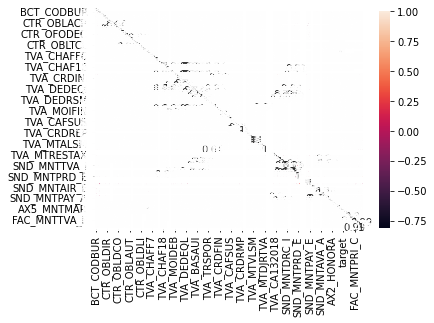

In [ ]:
sb.heatmap(train.corr(), annot=True)# use Plotly to do this 

# Feature Processing & Engineering
Here is the section to **clean**, **process** the dataset and **create new features**.

## Drop Duplicates

In [109]:
# Use pandas.DataFrame.drop_duplicates method
_ = train.shape[0]
train.drop_duplicates(inplace=True)
n_duplicated = _ - train.shape[0]
print("There is no duplicated rows in the dataset") if n_duplicated==0 else print(f"'{n_duplicated}' duplicated rows in the dataset")

There is no duplicated rows in the dataset


## Dataset Splitting

In [ ]:
# Please specify 
to_ignore_cols = [
    "id", # ID
    "",
]

In [ ]:
num_cols = list(set(test.select_dtypes('number')).intersection(train.select_dtypes('number')) - set(to_ignore_cols))
cat_cols = list(set(test.select_dtypes(exclude='number')).intersection(train.select_dtypes(exclude='number')) - set(to_ignore_cols))
print(f"The '{len(num_cols)}' numeric columns are : {num_cols}\nThe '{len(cat_cols)}' categorical columns are : {cat_cols}" )

plausible_targets = list(set(train) - set(test))
print(f"The '{len(plausible_targets)}' plausible target columns are : {plausible_targets}")
plausible_targets_dict = {i:col for (i,col) in enumerate(plausible_targets) }
target_col = plausible_targets[0] if len(plausible_targets)==1 else plausible_targets[int(input(f"Please enter the index of your target, {plausible_targets_dict}\n>"))]
print(f"The target is : '{target_col}' of type {train[target_col].dtype}")

The '118' numeric columns are : ['TVA_BASRSM', 'TVA_CHAFF6', 'TVA_RESTIT', 'TVA_CRDBLQ', 'TVA_CHAF15', 'FAC_MNTDCO_C', 'ADB_MNTORD', 'TVA_MTDJRTAX', 'TVA_BASIMB', 'TVA_DEDREG', 'TVA_ACHSUS', 'TVA_ACHNDD', 'CTR_OFODEC', 'CTR_OBLTVA', 'TVA_MTDJRTVA', 'AX2_HONORA', 'TVA_MACHN', 'TVA_CHAF22', 'BCT_CODBUR', 'SND_MNTAVA_A', 'SND_MNTTAX_I', 'TVA_MOIFIN', 'TVA_CA072018', 'CTR_OBLDLI', 'CTR_OBLRES', 'ACT_CODACT', 'FAC_MNTTVA_F', 'CTR_OBLFOP', 'TVA_CAFEXP', 'TVA_CRDRMP', 'TVA_DEDAUI', 'TVA_CA132018', 'AX3_REVCAP', 'CTR_OFODET', 'TVA_CRDREP', 'TVA_DEDIMB', 'CTR_OBLTVI', 'FAC_MNTTVA_C', 'CTR_OBLTFP', 'TVA_MTRESTAX', 'CTR_OBLDCO', 'SND_MNTPRD_A', 'TVA_TOTDUE', 'TVA_CAF125', 'CTR_OFODEP', 'SND_MNTDRC_E', 'TVA_CHAF29', 'CTR_ODTIMB', 'FAC_MNTPRI_F', 'TVA_DEDAUL', 'TVA_CA192018', 'CTR_OBLTCL', 'CTR_OBLTHO', 'SND_MNTTVA_A', 'SND_MNTTAX_A', 'SND_MNTPAY_A', 'TVA_CRDINI', 'AX1_BRTIMP', 'FAC_MNTDCO_F', 'FAC_MNTPRI_C', 'FAC_MFODEC_F', 'TVA_MTVLSM', 'TVA_TXALSM', 'SND_MNTAIR_E', 'TVA_BASEQL', 'TVA_CHAFF7', 'S

array([[<AxesSubplot:title={'center':'target'}>]], dtype=object)

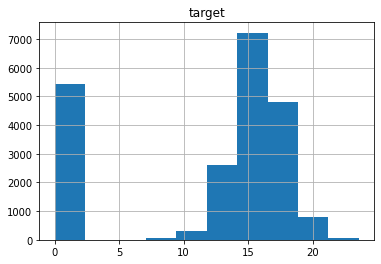

In [ ]:
train[plausible_targets].hist()

In [110]:
train[plausible_targets].min(), train[plausible_targets].mean(), train[plausible_targets].max()

(target    0.0
 dtype: float64, target    11.780084
 dtype: float64, target    23.591334
 dtype: float64)

In [111]:
X = train[num_cols+cat_cols]
y_ = train[[target_col]]

bin = Binarizer(threshold=5).fit(y_)
y = bin.transform(y_)

X_test = test[num_cols+cat_cols]

In [116]:
y.shape

(21295, 1)

In [121]:
# count occurencies of each unique value
pd.Series(y.reshape(-1,)).value_counts()

1.0    15878
0.0     5417
dtype: int64

In [122]:
# Use train_test_split with a random_state, and add stratify for Classification
stratify = y if y.dtype == "O" else None
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = stratify )  

In [123]:
X_train.shape, y_train.shape

((17036, 119), (17036, 1))

In [124]:
X_eval.shape, y_eval.shape

((4259, 119), (4259, 1))

In [125]:
X_test.shape

(7517, 119)

## Impute Missing Values

In [ ]:
# Use sklearn.impute.SimpleImputer

In [128]:
print(X_train[num_cols].isna().sum()/X_train.shape[0]) # [0, 1]

TVA_BASRSM      0.079009
TVA_CHAFF6      0.079009
TVA_RESTIT      0.079009
TVA_CRDBLQ      0.079009
TVA_CHAF15      0.079009
                  ...   
CTR_RATISS      0.000000
SND_MNTPRD_I    0.824607
TVA_BASEQI      0.079009
TVA_ACHEXO      0.079009
SND_MNTDRC_A    0.862996
Length: 118, dtype: float64


In [129]:
num_imputer = SimpleImputer(strategy="mean").fit(X_train[num_cols])
cat_imputer = SimpleImputer(strategy="most_frequent").fit(X_train[cat_cols])

In [130]:
# num_imputer = SimpleImputer(strategy="mean")
# num_imputer.fit(X_train[num_cols]) # return the fitted exact SimpleImputer()

In [131]:
num_imputer.transform(X_train[num_cols]) # numpy array as output

array([[4.84668920e+07, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.02471450e+07, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.74927378e+06],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.74927378e+06],
       ...,
       [4.46966207e+07, 1.52377939e+08, 3.36308417e+07, ...,
        9.74303746e+07, 3.38029898e+07, 1.74927378e+06],
       [0.00000000e+00, 1.60792500e+07, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.74927378e+06],
       [0.00000000e+00, 0.00000000e+00, 5.44120979e+08, ...,
        0.00000000e+00, 0.00000000e+00, 1.74927378e+06]])

In [132]:
X_train_num_imputed = pd.DataFrame(num_imputer.transform(X_train[num_cols]), columns=num_cols)
X_eval_num_imputed = pd.DataFrame(num_imputer.transform(X_eval[num_cols]), columns=num_cols)
X_test_num_imputed = pd.DataFrame(num_imputer.transform(X_test[num_cols]), columns=num_cols)

X_train_cat_imputed = pd.DataFrame(cat_imputer.transform(X_train[cat_cols]), columns=cat_cols)
X_eval_cat_imputed = pd.DataFrame(cat_imputer.transform(X_eval[cat_cols]), columns=cat_cols)
X_test_cat_imputed = pd.DataFrame(cat_imputer.transform(X_test[cat_cols]), columns=cat_cols)

X_train_imputed = pd.concat([X_train_num_imputed, X_train_cat_imputed], axis=1)
X_eval_imputed = pd.concat([X_eval_num_imputed, X_eval_cat_imputed], axis=1)
X_test_imputed = pd.concat([X_test_num_imputed, X_test_cat_imputed], axis=1)

In [133]:
X_train_imputed.head()

,TVA_BASRSM,TVA_CHAFF6,TVA_RESTIT,TVA_CRDBLQ,TVA_CHAF15,FAC_MNTDCO_C,ADB_MNTORD,TVA_MTDJRTAX,TVA_BASIMB,TVA_DEDREG,...,SND_MNTTVA_E,CTR_CESSAT,CTR_OBLASS,TVA_CRDFIN,CTR_RATISS,SND_MNTPRD_I,TVA_BASEQI,TVA_ACHEXO,SND_MNTDRC_A,CTR_CATEGO_X
0,48466892.0,0.0,0.0,0.0,0.0,0.000000,1.719963e+08,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.305885e+09,0.0,0.0,0.000000e+00,M
1,0.0,50247145.0,0.0,0.0,0.0,24157.620447,5.496605e+08,0.0,0.0,0.0,...,0.0,0.0,1.0,1086000.0,0.0,3.508845e+09,0.0,0.0,1.749274e+06,P
2,0.0,0.0,0.0,0.0,0.0,24157.620447,5.496605e+08,0.0,0.0,0.0,...,0.0,0.0,1.0,6791840.0,0.0,3.176149e+07,0.0,0.0,1.749274e+06,C
3,0.0,0.0,0.0,0.0,0.0,24157.620447,5.496605e+08,0.0,0.0,0.0,...,0.0,0.0,1.0,40163712.0,0.0,3.508845e+09,0.0,0.0,1.749274e+06,M
4,0.0,0.0,0.0,0.0,0.0,24157.620447,5.496605e+08,0.0,0.0,0.0,...,0.0,0.0,1.0,4883.0,0.0,3.508845e+09,0.0,0.0,1.749274e+06,M


## New Features Creation

In [ ]:
# Code here

## Features Encoding




In [ ]:
# From sklearn.preprocessing use OneHotEncoder to encode the categorical features.

In [134]:
encoder = OneHotEncoder(sparse=False, drop="first").fit(\
    X_train_cat_imputed.append(X_eval_cat_imputed)\
    .append(X_test_cat_imputed)\
    )
cat_encoded_cols = encoder.get_feature_names_out().tolist()

In [135]:
X_train_cat_encoded = pd.DataFrame(encoder.transform(X_train_cat_imputed), columns=cat_encoded_cols)
X_eval_cat_encoded = pd.DataFrame(encoder.transform(X_eval_cat_imputed), columns=cat_encoded_cols)
X_test_cat_encoded = pd.DataFrame(encoder.transform(X_test_cat_imputed), columns=cat_encoded_cols)

In [136]:
X_train_cat_encoded.head()

,CTR_CATEGO_X_M,CTR_CATEGO_X_N,CTR_CATEGO_X_P
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,0.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


## Features Scaling


In [ ]:
# From sklearn.preprocessing use StandardScaler, MinMaxScaler, etc.

In [142]:
scaler = StandardScaler().fit(X_train_num_imputed)

In [143]:
X_train_num_scaled = pd.DataFrame(scaler.transform(X_train_num_imputed), columns=num_cols)
X_eval_num_scaled = pd.DataFrame(scaler.transform(X_eval_num_imputed), columns=num_cols)
X_test_num_scaled = pd.DataFrame(scaler.transform(X_test_num_imputed), columns=num_cols)

In [144]:
X_train_num_scaled.head()

,TVA_BASRSM,TVA_CHAFF6,TVA_RESTIT,TVA_CRDBLQ,TVA_CHAF15,FAC_MNTDCO_C,ADB_MNTORD,TVA_MTDJRTAX,TVA_BASIMB,TVA_DEDREG,...,SND_MNTAVA_E,SND_MNTTVA_E,CTR_CESSAT,CTR_OBLASS,TVA_CRDFIN,CTR_RATISS,SND_MNTPRD_I,TVA_BASEQI,TVA_ACHEXO,SND_MNTDRC_A
0,0.004724,-0.087397,-0.068661,-0.036079,-0.039651,-1.608907e-01,-2.738044e-01,0.0,-0.04448,-0.037388,...,0.0,0.0,-0.21508,-0.007666,-0.108400,-0.10535,-3.214572e-01,-0.02107,-0.0345,-8.320919e-02
1,-0.056003,-0.058578,-0.068661,-0.036079,-0.039651,2.422908e-17,-8.642604e-17,0.0,-0.04448,-0.037388,...,0.0,0.0,-0.21508,-0.007666,-0.106634,-0.10535,1.391607e-16,-0.02107,-0.0345,2.215051e-17
2,-0.056003,-0.087397,-0.068661,-0.036079,-0.039651,2.422908e-17,-8.642604e-17,0.0,-0.04448,-0.037388,...,0.0,0.0,-0.21508,-0.007666,-0.097353,-0.10535,-5.073780e-01,-0.02107,-0.0345,2.215051e-17
3,-0.056003,-0.087397,-0.068661,-0.036079,-0.039651,2.422908e-17,-8.642604e-17,0.0,-0.04448,-0.037388,...,0.0,0.0,-0.21508,-0.007666,-0.043071,-0.10535,1.391607e-16,-0.02107,-0.0345,2.215051e-17
4,-0.056003,-0.087397,-0.068661,-0.036079,-0.039651,2.422908e-17,-8.642604e-17,0.0,-0.04448,-0.037388,...,0.0,0.0,-0.21508,-0.007666,-0.108392,-0.10535,1.391607e-16,-0.02107,-0.0345,2.215051e-17


## Association of numeric and categorical variables

In [145]:
X_train_ready = pd.concat([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_eval_ready = pd.concat([X_eval_num_scaled, X_eval_cat_encoded], axis=1)
X_test_ready = pd.concat([X_test_num_scaled, X_test_cat_encoded], axis=1)

In [146]:
X_train_ready.head()

,TVA_BASRSM,TVA_CHAFF6,TVA_RESTIT,TVA_CRDBLQ,TVA_CHAF15,FAC_MNTDCO_C,ADB_MNTORD,TVA_MTDJRTAX,TVA_BASIMB,TVA_DEDREG,...,CTR_OBLASS,TVA_CRDFIN,CTR_RATISS,SND_MNTPRD_I,TVA_BASEQI,TVA_ACHEXO,SND_MNTDRC_A,CTR_CATEGO_X_M,CTR_CATEGO_X_N,CTR_CATEGO_X_P
0,0.004724,-0.087397,-0.068661,-0.036079,-0.039651,-1.608907e-01,-2.738044e-01,0.0,-0.04448,-0.037388,...,-0.007666,-0.108400,-0.10535,-3.214572e-01,-0.02107,-0.0345,-8.320919e-02,1.0,0.0,0.0
1,-0.056003,-0.058578,-0.068661,-0.036079,-0.039651,2.422908e-17,-8.642604e-17,0.0,-0.04448,-0.037388,...,-0.007666,-0.106634,-0.10535,1.391607e-16,-0.02107,-0.0345,2.215051e-17,0.0,0.0,1.0
2,-0.056003,-0.087397,-0.068661,-0.036079,-0.039651,2.422908e-17,-8.642604e-17,0.0,-0.04448,-0.037388,...,-0.007666,-0.097353,-0.10535,-5.073780e-01,-0.02107,-0.0345,2.215051e-17,0.0,0.0,0.0
3,-0.056003,-0.087397,-0.068661,-0.036079,-0.039651,2.422908e-17,-8.642604e-17,0.0,-0.04448,-0.037388,...,-0.007666,-0.043071,-0.10535,1.391607e-16,-0.02107,-0.0345,2.215051e-17,1.0,0.0,0.0
4,-0.056003,-0.087397,-0.068661,-0.036079,-0.039651,2.422908e-17,-8.642604e-17,0.0,-0.04448,-0.037388,...,-0.007666,-0.108392,-0.10535,1.391607e-16,-0.02107,-0.0345,2.215051e-17,1.0,0.0,0.0


In [147]:
X_eval_ready.head()

,TVA_BASRSM,TVA_CHAFF6,TVA_RESTIT,TVA_CRDBLQ,TVA_CHAF15,FAC_MNTDCO_C,ADB_MNTORD,TVA_MTDJRTAX,TVA_BASIMB,TVA_DEDREG,...,CTR_OBLASS,TVA_CRDFIN,CTR_RATISS,SND_MNTPRD_I,TVA_BASEQI,TVA_ACHEXO,SND_MNTDRC_A,CTR_CATEGO_X_M,CTR_CATEGO_X_N,CTR_CATEGO_X_P
0,-0.056003,-0.087397,-0.068661,-0.036079,-0.039651,2.422908e-17,-8.642604e-17,0.0,-0.04448,-0.037388,...,-0.007666,-0.108400,-0.10535,1.391607e-16,-0.021070,-0.0345,2.215051e-17,0.0,0.0,1.0
1,-0.056003,-0.087397,-0.068661,-0.036079,-0.039651,2.422908e-17,-8.642604e-17,0.0,-0.04448,-0.037388,...,-0.007666,-0.107726,-0.10535,-4.858017e-01,-0.004756,-0.0345,-8.320919e-02,1.0,0.0,0.0
2,-0.019470,-0.087397,-0.068661,-0.036079,-0.039651,-1.608907e-01,-1.540158e-01,0.0,-0.04448,-0.037388,...,-0.007666,-0.108400,-0.10535,1.391607e-16,-0.021070,-0.0345,2.215051e-17,0.0,0.0,0.0
3,-0.056003,-0.087397,-0.068661,-0.036079,-0.039651,2.422908e-17,-3.775523e-01,0.0,-0.04448,-0.037388,...,-0.007666,-0.108352,-0.10535,1.391607e-16,-0.021070,-0.0345,2.215051e-17,1.0,0.0,0.0
4,-0.056003,-0.087397,-0.068661,-0.036079,-0.039651,2.422908e-17,-8.642604e-17,0.0,-0.04448,-0.037388,...,-0.007666,-0.108400,-0.10535,1.391607e-16,-0.021070,-0.0345,2.215051e-17,0.0,0.0,1.0


In [148]:
X_test_ready.head()

,TVA_BASRSM,TVA_CHAFF6,TVA_RESTIT,TVA_CRDBLQ,TVA_CHAF15,FAC_MNTDCO_C,ADB_MNTORD,TVA_MTDJRTAX,TVA_BASIMB,TVA_DEDREG,...,CTR_OBLASS,TVA_CRDFIN,CTR_RATISS,SND_MNTPRD_I,TVA_BASEQI,TVA_ACHEXO,SND_MNTDRC_A,CTR_CATEGO_X_M,CTR_CATEGO_X_N,CTR_CATEGO_X_P
0,-0.056003,0.077187,-0.068661,-0.036079,-0.039651,2.422908e-17,-3.737920e-01,0.0,-0.04448,-0.037388,...,-0.007666,-0.108400,-0.10535,1.391607e-16,-0.021070,-0.0345,2.215051e-17,1.0,0.0,0.0
1,-0.056003,-0.087397,-0.068661,-0.036079,-0.039651,2.422908e-17,-8.642604e-17,0.0,-0.04448,-0.037388,...,-0.007666,-0.108371,-0.10535,1.391607e-16,-0.021070,-0.0345,2.215051e-17,1.0,0.0,0.0
2,-0.056003,-0.087397,-0.068661,-0.036079,-0.039651,2.422908e-17,-8.642604e-17,0.0,-0.04448,-0.037388,...,-0.007666,-0.108400,-0.10535,1.391607e-16,-0.021070,-0.0345,2.215051e-17,0.0,0.0,0.0
3,-0.056003,-0.087397,-0.068661,-0.036079,-0.039651,2.422908e-17,-3.979569e-01,0.0,-0.04448,-0.037388,...,-0.007666,-0.107316,-0.10535,1.391607e-16,-0.021070,-0.0345,2.215051e-17,0.0,0.0,0.0
4,-0.056003,-0.087397,-0.068661,-0.036079,-0.039651,2.422908e-17,-8.642604e-17,0.0,-0.04448,-0.037388,...,-0.007666,-0.108400,-0.10535,1.391607e-16,-0.020963,-0.0345,2.215051e-17,0.0,0.0,1.0


## Optional: Train Dataset Balancing 

In [ ]:
# Use Over-sampling/Under-sampling methods, more details here: https://imbalanced-learn.org/stable/install.html

# Machine Learning Modeling 
Here is the section to **build**, **train**, **evaluate** and **compare** the models to each others.

In [ ]:
models_trained = []

## Simple Model #001

Please, keep the following structure to try all the model you want.

### Create the Model

In [ ]:
# Code here

In [150]:
# knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()

### Train the Model

In [ ]:
# Use the .fit method

In [151]:
# knn.fit(X_train_ready, y_train)
dt.fit(X_train_ready, y_train)

DecisionTreeClassifier()

In [152]:
# models_trained.append(knn)
models_trained.append(dt)

### Evaluate the Model on the Evaluation dataset (Evalset)

In [ ]:
# Compute the valid metrics for the use case # Optional: show the classification report 

In [153]:
# y_eval_pred = knn.predict(X_eval_ready)
y_eval_pred = dt.predict(X_eval_ready)

In [156]:
print(classification_report(y_true=y_eval, y_pred=y_eval_pred,
                    #   labels=None, 
                    target_names=["Correct citizens", "Fraud"], 
                      ))

                  precision    recall  f1-score   support

Correct citizens       0.52      0.54      0.53      1038
           Fraud       0.85      0.83      0.84      3221

        accuracy                           0.76      4259
       macro avg       0.68      0.69      0.69      4259
    weighted avg       0.77      0.76      0.77      4259



### Predict on an unknown dataset (Testset)

In [ ]:
# Use .predict method # .predict_proba is available just for classification

## Simple Model #002

### Create the Model

In [ ]:
# Code here

In [157]:
ada = AdaBoostClassifier()

### Train the Model

In [158]:
# Use the .fit method

In [159]:
ada.fit(X_train_ready, y_train)

AdaBoostClassifier()

In [160]:
models_trained.append(ada)

### Evaluate the Model on the Evaluation dataset (Evalset)

In [161]:
# Compute the valid metrics for the use case # Optional: show the classification report 

### Predict on a unknown dataset (Testset)

In [162]:
# Use .predict method # .predict_proba is available just for classification

## Model #003 : Pipeline

### Create the Model

In [164]:
# feature pipelines
num_pipe = Pipeline( steps=[("num_imputer", num_imputer), ("scaler", scaler)])
cat_pipe = Pipeline( steps=[("cat_imputer", cat_imputer), ("encoder", encoder)])

# end2end features preprocessor
preprocessor = ColumnTransformer(
    (
        ("numerical", num_pipe, num_cols),
        ("categorical", cat_pipe, cat_cols,),
    ),
    # verbose_feature_names_out=False,
)
preprocessor.set_output(transform="pandas")

# end2end pipeline
clf = Pipeline([('preprocessor', preprocessor), ('classifier', KNeighborsClassifier())])
clf.set_output(transform="pandas")

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=(('numerical',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['TVA_BASRSM', 'TVA_CHAFF6',
                                                   'TVA_RESTIT', 'TVA_CRDBLQ',
                                                   'TVA_CHAF15', 'FAC_MNTDCO_C',
                                                   'ADB_MNTORD', 'TVA_MTDJRTAX',
                                                   'TVA_BASIMB', 'TVA_DEDREG',
                                                   'TVA_ACHSUS', 'TVA_ACHNDD',
                                                   'CTR_OFODEC', 'CTR_OBLTVA',
                                                   'TVA_MTD...
                                                   'SND_MNTTAX_I', 'TVA_MOIFIN',
                                                   'TVA_CA072018', 'CTR_OBLDLI',
                                                   'CTR_OBLRES', 'ACT_CODACT',
                                                   'FAC_MNTTVA_F', 'CTR_OBLFOP',
                                                   'TVA_CAFEXP', 'TVA_CRDRMP', ...]),
                                                 ('categorical',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False,
                                                                                 sparse_output=False))]),
                                                  ['CTR_CATEGO_X'])))),
                ('classifier', KNeighborsClassifier())])

In [167]:
X_train.head()

,TVA_BASRSM,TVA_CHAFF6,TVA_RESTIT,TVA_CRDBLQ,TVA_CHAF15,FAC_MNTDCO_C,ADB_MNTORD,TVA_MTDJRTAX,TVA_BASIMB,TVA_DEDREG,...,SND_MNTTVA_E,CTR_CESSAT,CTR_OBLASS,TVA_CRDFIN,CTR_RATISS,SND_MNTPRD_I,TVA_BASEQI,TVA_ACHEXO,SND_MNTDRC_A,CTR_CATEGO_X
15736,48466892.0,0.0,0.0,0.0,0.0,0.0,171996262.0,0.0,0.0,0.0,...,0.0,0,1.0,0.0,0,1.305885e+09,0.0,0.0,0.0,M
4429,0.0,50247145.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,...,NaN,0,1.0,1086000.0,0,NaN,0.0,0.0,NaN,P
2355,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,...,NaN,0,1.0,6791840.0,0,3.176149e+07,0.0,0.0,NaN,C
9556,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,...,NaN,0,1.0,40163712.0,0,NaN,0.0,0.0,NaN,M
17009,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,...,NaN,0,1.0,4883.0,0,NaN,0.0,0.0,NaN,M


In [168]:
preprocessor.fit_transform(X_train)

,numerical__TVA_BASRSM,numerical__TVA_CHAFF6,numerical__TVA_RESTIT,numerical__TVA_CRDBLQ,numerical__TVA_CHAF15,numerical__FAC_MNTDCO_C,numerical__ADB_MNTORD,numerical__TVA_MTDJRTAX,numerical__TVA_BASIMB,numerical__TVA_DEDREG,...,numerical__CTR_OBLASS,numerical__TVA_CRDFIN,numerical__CTR_RATISS,numerical__SND_MNTPRD_I,numerical__TVA_BASEQI,numerical__TVA_ACHEXO,numerical__SND_MNTDRC_A,categorical__CTR_CATEGO_X_M,categorical__CTR_CATEGO_X_N,categorical__CTR_CATEGO_X_P
15736,0.004724,-0.087397,-0.068661,-0.036079,-3.965112e-02,-1.608907e-01,-2.738044e-01,0.0,-0.04448,-0.037388,...,-0.007666,-1.084004e-01,-0.10535,-3.214572e-01,-2.106968e-02,-3.449996e-02,-8.320919e-02,1.0,0.0,0.0
4429,-0.056003,-0.058578,-0.068661,-0.036079,-3.965112e-02,2.422908e-17,-8.642604e-17,0.0,-0.04448,-0.037388,...,-0.007666,-1.066340e-01,-0.10535,1.391607e-16,-2.106968e-02,-3.449996e-02,2.215051e-17,0.0,0.0,1.0
2355,-0.056003,-0.087397,-0.068661,-0.036079,-3.965112e-02,2.422908e-17,-8.642604e-17,0.0,-0.04448,-0.037388,...,-0.007666,-9.735299e-02,-0.10535,-5.073780e-01,-2.106968e-02,-3.449996e-02,2.215051e-17,0.0,0.0,0.0
9556,-0.056003,-0.087397,-0.068661,-0.036079,-3.965112e-02,2.422908e-17,-8.642604e-17,0.0,-0.04448,-0.037388,...,-0.007666,-4.307121e-02,-0.10535,1.391607e-16,-2.106968e-02,-3.449996e-02,2.215051e-17,1.0,0.0,0.0
17009,-0.056003,-0.087397,-0.068661,-0.036079,-3.965112e-02,2.422908e-17,-8.642604e-17,0.0,-0.04448,-0.037388,...,-0.007666,-1.083925e-01,-0.10535,1.391607e-16,-2.106968e-02,-3.449996e-02,2.215051e-17,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-0.056003,-0.087397,-0.068661,-0.036079,-3.965112e-02,2.422908e-17,-3.253660e-01,0.0,-0.04448,-0.037388,...,-0.007666,-1.028475e-01,-0.10535,1.391607e-16,-2.106968e-02,-3.449996e-02,2.215051e-17,0.0,0.0,0.0
17289,-0.056003,-0.087397,-0.068661,-0.036079,-3.965112e-02,2.422908e-17,-8.642604e-17,0.0,-0.04448,-0.037388,...,-0.007666,-1.084004e-01,-0.10535,1.391607e-16,-2.106968e-02,-3.449996e-02,2.215051e-17,0.0,0.0,0.0
5192,0.000000,0.000000,0.000000,0.000000,-8.651127e-18,2.422908e-17,-3.980293e-01,0.0,0.00000,0.000000,...,-0.007666,1.211891e-17,-0.10535,1.391607e-16,3.222432e-18,-7.604201e-18,2.215051e-17,1.0,0.0,0.0
12172,-0.056003,-0.078175,-0.068661,-0.036079,-3.965112e-02,2.422908e-17,-8.642604e-17,0.0,-0.04448,-0.037388,...,-0.007666,-1.084004e-01,-0.10535,1.391607e-16,-2.106968e-02,-3.449996e-02,2.215051e-17,0.0,0.0,1.0


### Train the Model

In [ ]:
# Use the .fit method

In [169]:
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=(('numerical',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['TVA_BASRSM', 'TVA_CHAFF6',
                                                   'TVA_RESTIT', 'TVA_CRDBLQ',
                                                   'TVA_CHAF15', 'FAC_MNTDCO_C',
                                                   'ADB_MNTORD', 'TVA_MTDJRTAX',
                                                   'TVA_BASIMB', 'TVA_DEDREG',
                                                   'TVA_ACHSUS', 'TVA_ACHNDD',
                                                   'CTR_OFODEC', 'CTR_OBLTVA',
                                                   'TVA_MTD...
                                                   'SND_MNTTAX_I', 'TVA_MOIFIN',
                                                   'TVA_CA072018', 'CTR_OBLDLI',
                                                   'CTR_OBLRES', 'ACT_CODACT',
                                                   'FAC_MNTTVA_F', 'CTR_OBLFOP',
                                                   'TVA_CAFEXP', 'TVA_CRDRMP', ...]),
                                                 ('categorical',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False,
                                                                                 sparse_output=False))]),
                                                  ['CTR_CATEGO_X'])))),
                ('classifier', KNeighborsClassifier())])

In [170]:
models_trained.append(clf)

### Evaluate the Model on the Evaluation dataset (Evalset)

In [ ]:
# Compute the valid metrics for the use case # Optional: show the classification report 

In [173]:
X_eval.head()

,TVA_BASRSM,TVA_CHAFF6,TVA_RESTIT,TVA_CRDBLQ,TVA_CHAF15,FAC_MNTDCO_C,ADB_MNTORD,TVA_MTDJRTAX,TVA_BASIMB,TVA_DEDREG,...,SND_MNTTVA_E,CTR_CESSAT,CTR_OBLASS,TVA_CRDFIN,CTR_RATISS,SND_MNTPRD_I,TVA_BASEQI,TVA_ACHEXO,SND_MNTDRC_A,CTR_CATEGO_X
5617,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,...,NaN,0,1.0,0.0,0,NaN,0.0,0.0,NaN,P
18237,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,...,NaN,0,1.0,414674.0,0,179624289.0,75437672.0,0.0,0.0,M
15523,29157580.0,0.0,0.0,0.0,0.0,0.0,337223150.0,0.0,0.0,0.0,...,NaN,0,1.0,0.0,0,NaN,0.0,0.0,NaN,C
5714,0.0,0.0,0.0,0.0,0.0,NaN,28894568.0,0.0,0.0,0.0,...,NaN,0,1.0,29770.0,0,NaN,0.0,0.0,NaN,M
17656,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,...,NaN,0,1.0,0.0,0,NaN,0.0,0.0,NaN,P


In [172]:
clf.predict(X_eval)

array([1., 1., 1., ..., 1., 1., 1.])

In [175]:
y_eval_pred = clf.predict(X_eval)
print(classification_report(y_true=y_eval, y_pred=y_eval_pred,
                    #   labels=None, 
                    target_names=["Correct citizens", "Fraud"], 
                      ))

                  precision    recall  f1-score   support

Correct citizens       0.48      0.26      0.34      1038
           Fraud       0.79      0.91      0.85      3221

        accuracy                           0.75      4259
       macro avg       0.64      0.59      0.59      4259
    weighted avg       0.72      0.75      0.72      4259



### Predict on a unknown dataset (Testset)

In [ ]:
# Use .predict method # .predict_proba is available just for classification

## Models comparison
Create a pandas dataframe that will allow you to compare your models.

Find a sample frame below :

|     | Model_Name     | Metric (metric_name)    | Details  |
|:---:|:--------------:|:--------------:|:-----------------:|
| 0   |  -             |  -             | -                 |
| 1   |  -             |  -             | -                 |


You might use the pandas dataframe method `.sort_values()` to sort the dataframe regarding the metric.

In [176]:
metric = f1_score

In [177]:
len(models_trained)

3

In [180]:
info = [ {"Model_Name": model.__str__(),
          f"Metric ({metric.__name__})": metric(
              y_true=y_eval,
              y_pred=model.predict(X_eval_ready),
              ),
          } for model in models_trained[:-1] ] + \
          [ {"Model_Name":"pipeline",
          f"Metric ({metric.__name__})": metric(
              y_true=y_eval,
              y_pred=model.predict(X_eval),
              ),
          } for model in models_trained[-1:] ]

In [181]:
info

[{'Model_Name': 'DecisionTreeClassifier()',
  'Metric (f1_score)': 0.8425505248315839},
 {'Model_Name': 'AdaBoostClassifier()',
  'Metric (f1_score)': 0.8762749445676277},
 {'Model_Name': 'pipeline', 'Metric (f1_score)': 0.8467216673903603}]

In [182]:
pd.DataFrame(info).sort_values(ascending=False, by=f"Metric ({metric.__name__})")

,Model_Name,Metric (f1_score)
1,AdaBoostClassifier(),0.876275
2,pipeline,0.846722
0,DecisionTreeClassifier(),0.842551


## Hyperparameters tuning 

Fine-tune the Top-k models (3 < k < 5) using a ` GridSearchCV`  (that is in sklearn.model_selection
) to find the best hyperparameters and achieve the maximum performance of each of the Top-k models, then compare them again to select the best one.

In [183]:
print(models_trained[0].get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [184]:
best_models_trained = []

### Hp tuning model #1

In [186]:
models_trained[0]

DecisionTreeClassifier()

In [185]:
models_trained[0].get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [190]:
parameters = {
 'criterion': ["gini","entropy", "log_loss" ],
 'random_state': [10],
 'min_samples_leaf': [1, 2, 5,],
 'min_samples_split': [2, 5, 10, 15],}

In [ ]:
# parameters = {
#  'leaf_size': [10, 20, 30, 40],
#  'metric': ['minkowski'],
#  'n_neighbors': [3, 5, 10, 15],}

In [191]:
# instantiate the Searcher
searcher = GridSearchCV(
    estimator=models_trained[0],
    param_grid=parameters,
    scoring=['accuracy', 'balanced_accuracy', 'f1', 'precision', 'recall', 'roc_auc'],
    refit='balanced_accuracy', # True
    cv=5, #StratifiedKFold(n_splits=5, shuffle=True, random_state=1) #(4 train, 1 test)
    verbose=3 #verbose=3 # Show the steps as output
)

In [ ]:
# if cv=3, 
# 1/3 size of the eval, 
# (cv-1)/3 size of the train

In [192]:
searcher.fit(X_train_ready, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END criterion=gini, min_samples_leaf=1, min_samples_split=2, random_state=10; accuracy: (test=0.755) balanced_accuracy: (test=0.679) f1: (test=0.835) precision: (test=0.835) recall: (test=0.835) roc_auc: (test=0.679) total time=   0.6s
[CV 2/5] END criterion=gini, min_samples_leaf=1, min_samples_split=2, random_state=10; accuracy: (test=0.771) balanced_accuracy: (test=0.702) f1: (test=0.845) precision: (test=0.848) recall: (test=0.843) roc_auc: (test=0.702) total time=   0.6s
[CV 3/5] END criterion=gini, min_samples_leaf=1, min_samples_split=2, random_state=10; accuracy: (test=0.765) balanced_accuracy: (test=0.699) f1: (test=0.841) precision: (test=0.846) recall: (test=0.836) roc_auc: (test=0.699) total time=   0.6s
[CV 4/5] END criterion=gini, min_samples_leaf=1, min_samples_split=2, random_state=10; accuracy: (test=0.768) balanced_accuracy: (test=0.693) f1: (test=0.844) precision: (test=0.841) recall: (test=0.847)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10, 15],
                         'random_state': [10]},
             refit='balanced_accuracy',
             scoring=['accuracy', 'balanced_accuracy', 'f1', 'precision',
                      'recall', 'roc_auc'],
             verbose=3)

In [193]:
search_history = pd.DataFrame(searcher.cv_results_)
search_history

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_min_samples_leaf,param_min_samples_split,param_random_state,params,split0_test_accuracy,...,std_test_recall,rank_test_recall,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,split3_test_roc_auc,split4_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc
0,0.548824,0.015539,0.027982,0.006594,gini,1,2,10,"{'criterion': 'gini', 'min_samples_leaf': 1, '...",0.754695,...,0.005087,11,0.678872,0.702175,0.698641,0.692757,0.682440,0.690977,0.009019,34
1,0.532812,0.013619,0.023220,0.000287,gini,1,5,10,"{'criterion': 'gini', 'min_samples_leaf': 1, '...",0.747359,...,0.006194,24,0.688987,0.703958,0.698516,0.700671,0.690620,0.696551,0.005798,31
2,0.531354,0.007052,0.024287,0.001315,gini,1,10,10,"{'criterion': 'gini', 'min_samples_leaf': 1, '...",0.759977,...,0.005909,27,0.716212,0.725295,0.730464,0.721778,0.711225,0.720995,0.006740,22
3,0.683178,0.090122,0.035077,0.006355,gini,1,15,10,"{'criterion': 'gini', 'min_samples_leaf': 1, '...",0.747066,...,0.002719,28,0.721300,0.738441,0.747147,0.736773,0.724550,0.733642,0.009489,16
4,0.535788,0.066076,0.023406,0.000299,gini,2,2,10,"{'criterion': 'gini', 'min_samples_leaf': 2, '...",0.747946,...,0.006071,35,0.699888,0.715415,0.710893,0.702515,0.696293,0.705001,0.007090,26
5,0.497505,0.015846,0.023449,0.000510,gini,2,5,10,"{'criterion': 'gini', 'min_samples_leaf': 2, '...",0.746479,...,0.004197,36,0.702429,0.722909,0.714264,0.703737,0.692365,0.707141,0.010502,25
6,0.492910,0.013308,0.024067,0.001998,gini,2,10,10,"{'criterion': 'gini', 'min_samples_leaf': 2, '...",0.751761,...,0.005496,30,0.718421,0.736476,0.730767,0.727595,0.724181,0.727488,0.006078,19
7,0.498908,0.011197,0.023922,0.000965,gini,2,15,10,"{'criterion': 'gini', 'min_samples_leaf': 2, '...",0.750587,...,0.002445,29,0.733094,0.758270,0.749212,0.744153,0.740682,0.745082,0.008425,7
8,0.637721,0.042144,0.033984,0.005312,gini,5,2,10,"{'criterion': 'gini', 'min_samples_leaf': 5, '...",0.765258,...,0.007754,2,0.750706,0.772928,0.747443,0.745526,0.731389,0.749598,0.013404,2
9,0.441833,0.012023,0.024930,0.003930,gini,5,5,10,"{'criterion': 'gini', 'min_samples_leaf': 5, '...",0.765258,...,0.007754,2,0.750706,0.772928,0.747443,0.745526,0.731389,0.749598,0.013404,2


In [194]:
searcher.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'random_state': 10}

In [195]:
searcher.best_estimator_

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2,
                       min_samples_split=10, random_state=10)

In [196]:
best_models_trained.append(searcher.best_estimator_)

### Hp tuning model #2

In [197]:
models_trained[1].get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [198]:
parameters = {
 'n_estimators': [30, 50, 100, 200, 300],
 'random_state': [10],}

In [199]:
# instantiate the Searcher
searcher = GridSearchCV(
    estimator=models_trained[1],
    param_grid=parameters,
    scoring=['accuracy', 'balanced_accuracy', 'f1', 'precision', 'recall', 'roc_auc'],
    refit='balanced_accuracy', # True
    cv=5, #StratifiedKFold(n_splits=5, shuffle=True, random_state=1) #(4 train, 1 test)
    verbose=3 #verbose=3 # Show the steps as output
)

In [203]:
searcher.fit(X_train_ready, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END n_estimators=30, random_state=10; accuracy: (test=0.797) balanced_accuracy: (test=0.668) f1: (test=0.872) precision: (test=0.819) recall: (test=0.934) roc_auc: (test=0.821) total time=   2.7s
[CV 2/5] END n_estimators=30, random_state=10; accuracy: (test=0.807) balanced_accuracy: (test=0.695) f1: (test=0.877) precision: (test=0.833) recall: (test=0.926) roc_auc: (test=0.842) total time=   1.9s
[CV 3/5] END n_estimators=30, random_state=10; accuracy: (test=0.798) balanced_accuracy: (test=0.688) f1: (test=0.871) precision: (test=0.831) recall: (test=0.915) roc_auc: (test=0.801) total time=   1.4s
[CV 4/5] END n_estimators=30, random_state=10; accuracy: (test=0.802) balanced_accuracy: (test=0.684) f1: (test=0.875) precision: (test=0.827) recall: (test=0.928) roc_auc: (test=0.826) total time=   1.4s
[CV 5/5] END n_estimators=30, random_state=10; accuracy: (test=0.802) balanced_accuracy: (test=0.685) f1: (test=0.874) p

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': [30, 50, 100, 200, 300],
                         'random_state': [10]},
             refit='balanced_accuracy',
             scoring=['accuracy', 'balanced_accuracy', 'f1', 'precision',
                      'recall', 'roc_auc'],
             verbose=3)

In [204]:
search_history = pd.DataFrame(searcher.cv_results_)
search_history

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_random_state,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,...,std_test_recall,rank_test_recall,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,split3_test_roc_auc,split4_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc
0,1.777440,0.447109,0.112920,0.030036,30,10,"{'n_estimators': 30, 'random_state': 10}",0.797242,0.807455,0.798356,...,0.006012,1,0.821100,0.841980,0.801426,0.826418,0.808660,0.819917,0.014136,5
1,2.613734,0.427461,0.149680,0.024613,50,10,"{'n_estimators': 50, 'random_state': 10}",0.799296,0.806281,0.799237,...,0.009990,2,0.824404,0.841276,0.803481,0.828843,0.819477,0.823496,0.012348,4
2,5.745903,1.942672,0.366999,0.127030,100,10,"{'n_estimators': 100, 'random_state': 10}",0.803110,0.807749,0.794541,...,0.009724,3,0.824760,0.840756,0.803509,0.833645,0.820486,0.824631,0.012686,2
3,11.929741,1.570776,0.572897,0.130982,200,10,"{'n_estimators': 200, 'random_state': 10}",0.798415,0.804520,0.795128,...,0.008129,4,0.822286,0.836901,0.806098,0.834356,0.819785,0.823885,0.011089,3
4,14.521634,0.821628,0.796530,0.185001,300,10,"{'n_estimators': 300, 'random_state': 10}",0.795481,0.806281,0.795715,...,0.008148,5,0.823705,0.834864,0.807264,0.835445,0.821933,0.824642,0.010309,1


In [205]:
searcher.best_params_

{'n_estimators': 100, 'random_state': 10}

In [206]:
searcher.best_estimator_

AdaBoostClassifier(n_estimators=100, random_state=10)

In [207]:
best_models_trained.append(searcher.best_estimator_)

### Hp tuning model #3 : Pipeline

In [209]:
models_trained[-1].get_params()

{'memory': None,
 'steps': [('preprocessor', ColumnTransformer(transformers=(('numerical',
                                    Pipeline(steps=[('num_imputer',
                                                     SimpleImputer()),
                                                    ('scaler', StandardScaler())]),
                                    ['TVA_BASRSM', 'TVA_CHAFF6', 'TVA_RESTIT',
                                     'TVA_CRDBLQ', 'TVA_CHAF15', 'FAC_MNTDCO_C',
                                     'ADB_MNTORD', 'TVA_MTDJRTAX', 'TVA_BASIMB',
                                     'TVA_DEDREG', 'TVA_ACHSUS', 'TVA_ACHNDD',
                                     'CTR_OFODEC', 'CTR_OBLTVA', 'TVA_MTDJRTVA',
                                     'AX2_HONORA', 'TVA_MACHN',...
                                     'BCT_CODBUR', 'SND_MNTAVA_A', 'SND_MNTTAX_I',
                                     'TVA_MOIFIN', 'TVA_CA072018', 'CTR_OBLDLI',
                                     'CTR_OBLRES', 'AC

In [210]:
parameters = {
    'preprocessor__numerical__scaler': [StandardScaler(), 
                                        RobustScaler()],
 'classifier__leaf_size': [10, 20, 30, 40],
 'classifier__metric': ['minkowski'],
 'classifier__n_neighbors': [3, 5, 10, 15],
 }

In [211]:
# instantiate the Searcher
searcher = GridSearchCV(
    estimator=models_trained[-1],
    param_grid=parameters,
    scoring=['accuracy', 'balanced_accuracy', 'f1', 'precision', 'recall', 'roc_auc'],
    refit='balanced_accuracy', # True
    cv=5, #StratifiedKFold(n_splits=5, shuffle=True, random_state=1) #(4 train, 1 test)
    verbose=3 #verbose=3 # Show the steps as output
)

In [212]:
searcher.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END classifier__leaf_size=10, classifier__metric=minkowski, classifier__n_neighbors=3, preprocessor__numerical__scaler=StandardScaler(); accuracy: (test=0.731) balanced_accuracy: (test=0.586) f1: (test=0.830) precision: (test=0.782) recall: (test=0.883) roc_auc: (test=0.619) total time=   1.4s
[CV 2/5] END classifier__leaf_size=10, classifier__metric=minkowski, classifier__n_neighbors=3, preprocessor__numerical__scaler=StandardScaler(); accuracy: (test=0.729) balanced_accuracy: (test=0.596) f1: (test=0.826) precision: (test=0.788) recall: (test=0.868) roc_auc: (test=0.645) total time=   1.3s
[CV 3/5] END classifier__leaf_size=10, classifier__metric=minkowski, classifier__n_neighbors=3, preprocessor__numerical__scaler=StandardScaler(); accuracy: (test=0.735) balanced_accuracy: (test=0.601) f1: (test=0.831) precision: (test=0.790) recall: (test=0.878) roc_auc: (test=0.653) total time=   1.3s
[CV 4/5] END classifier__l

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=(('numerical',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['TVA_BASRSM',
                                                                          'TVA_CHAFF6',
                                                                          'TVA_RESTIT',
                                                                          'TVA_CRDBLQ',
                                                                          'TVA_CHAF15',
                                                                          'FAC_MNTDCO_C',
                                                                          'ADB_MNTORD',
                                                                          'TVA_MTDJRTAX',
                                                                          'TVA_BASIMB',
                                                                          'TVA_DEDREG',
                                                                          'TVA_ACHSUS',
                                                                          'TVA_ACHNDD',
                                                                          'CTR_O...
                                                                         ['CTR_CATEGO_X'])))),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__leaf_size': [10, 20, 30, 40],
                         'classifier__metric': ['minkowski'],
                         'classifier__n_neighbors': [3, 5, 10, 15],
                         'preprocessor__numerical__scaler': [StandardScaler(),
                                                             RobustScaler()]},
             refit='balanced_accuracy',
             scoring=['accuracy', 'balanced_accuracy', 'f1', 'precision',
                      'recall', 'roc_auc'],
             verbose=3)

In [213]:
search_history = pd.DataFrame(searcher.cv_results_)
search_history

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__leaf_size,param_classifier__metric,param_classifier__n_neighbors,param_preprocessor__numerical__scaler,params,split0_test_accuracy,...,std_test_recall,rank_test_recall,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,split3_test_roc_auc,split4_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc
0,0.144344,0.017456,1.420449,0.376177,10,minkowski,3,StandardScaler(),"{'classifier__leaf_size': 10, 'classifier__met...",0.730634,...,0.006543,25,0.618851,0.644903,0.653341,0.650378,0.642997,0.642094,0.012199,29
1,0.186543,0.036395,1.239878,0.127028,10,minkowski,3,RobustScaler(),"{'classifier__leaf_size': 10, 'classifier__met...",0.713028,...,0.023679,29,0.660539,0.678087,0.661062,0.673109,0.648122,0.664184,0.010526,25
2,0.205622,0.128528,1.628964,0.345734,10,minkowski,5,StandardScaler(),"{'classifier__leaf_size': 10, 'classifier__met...",0.746185,...,0.005364,13,0.655745,0.667665,0.669363,0.671943,0.658684,0.664680,0.006315,21
3,0.171734,0.006982,1.193714,0.010690,10,minkowski,5,RobustScaler(),"{'classifier__leaf_size': 10, 'classifier__met...",0.722711,...,0.021858,17,0.676827,0.694962,0.681369,0.686397,0.663602,0.680631,0.010427,13
4,0.138430,0.017292,1.530386,0.419398,10,minkowski,10,StandardScaler(),"{'classifier__leaf_size': 10, 'classifier__met...",0.755282,...,0.005538,9,0.681501,0.676076,0.671107,0.681473,0.676868,0.677405,0.003874,17
5,0.167448,0.001360,1.188883,0.012225,10,minkowski,10,RobustScaler(),"{'classifier__leaf_size': 10, 'classifier__met...",0.739143,...,0.019095,21,0.702961,0.726455,0.700443,0.703714,0.686979,0.704110,0.012710,5
6,0.148331,0.022323,1.531462,0.412182,10,minkowski,15,StandardScaler(),"{'classifier__leaf_size': 10, 'classifier__met...",0.756455,...,0.003783,1,0.688347,0.688120,0.669159,0.679375,0.683144,0.681629,0.007073,9
7,0.168320,0.003123,1.320707,0.219629,10,minkowski,15,RobustScaler(),"{'classifier__leaf_size': 10, 'classifier__met...",0.738263,...,0.023305,5,0.711967,0.732895,0.711960,0.712655,0.700307,0.713957,0.010532,1
8,0.236497,0.134639,1.815412,0.448082,20,minkowski,3,StandardScaler(),"{'classifier__leaf_size': 20, 'classifier__met...",0.730634,...,0.006543,25,0.618851,0.644903,0.653341,0.650378,0.642997,0.642094,0.012199,29
9,0.259944,0.090249,1.694858,0.444011,20,minkowski,3,RobustScaler(),"{'classifier__leaf_size': 20, 'classifier__met...",0.713028,...,0.023679,29,0.660539,0.678087,0.661062,0.673109,0.648122,0.664184,0.010526,25


In [214]:
searcher.best_params_

{'classifier__leaf_size': 10,
 'classifier__metric': 'minkowski',
 'classifier__n_neighbors': 10,
 'preprocessor__numerical__scaler': RobustScaler()}

In [215]:
searcher.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=(('numerical',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['TVA_BASRSM', 'TVA_CHAFF6',
                                                   'TVA_RESTIT', 'TVA_CRDBLQ',
                                                   'TVA_CHAF15', 'FAC_MNTDCO_C',
                                                   'ADB_MNTORD', 'TVA_MTDJRTAX',
                                                   'TVA_BASIMB', 'TVA_DEDREG',
                                                   'TVA_ACHSUS', 'TVA_ACHNDD',
                                                   'CTR_OFODEC', 'CTR_OBLTVA',
                                                   'TVA_MTDJR...
                                                   'TVA_CA072018', 'CTR_OBLDLI',
                                                   'CTR_OBLRES', 'ACT_CODACT',
                                                   'FAC_MNTTVA_F', 'CTR_OBLFOP',
                                                   'TVA_CAFEXP', 'TVA_CRDRMP', ...]),
                                                 ('categorical',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False,
                                                                                 sparse_output=False))]),
                                                  ['CTR_CATEGO_X'])))),
                ('classifier',
                 KNeighborsClassifier(leaf_size=10, n_neighbors=10))])

In [216]:
best_models_trained.append(searcher.best_estimator_)

## Models comparison

In [223]:
metric

<function sklearn.metrics._classification.f1_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>

In [ ]:
metric(y_true=y_eval, y_pred=model.predict(X_eval_ready), ),

In [ ]:
ppp = model.predict(X_eval_ready) 
f1_score(y_true=y_eval, y_pred=ppp, )

In [219]:
info_ = [ {"Model_Name": model.__str__(),
          f"Metric ({metric.__name__})": metric(
              y_true=y_eval,
              y_pred=model.predict(X_eval_ready),
              ),
          } for model in best_models_trained[:-1] ] + \
          [ {"Model_Name":"pipeline hp",
          f"Metric ({metric.__name__})": metric(
              y_true=y_eval,
              y_pred=model.predict(X_eval),
              ),
          } for model in best_models_trained[-1:] ] + info

In [221]:
info_

[{'Model_Name': "DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2,\n                       min_samples_split=10, random_state=10)",
  'Metric (f1_score)': 0.8440137542982182},
 {'Model_Name': 'AdaBoostClassifier(n_estimators=100, random_state=10)',
  'Metric (f1_score)': 0.8752040362071524},
 {'Model_Name': 'pipeline hp', 'Metric (f1_score)': 0.8473282442748091},
 {'Model_Name': 'DecisionTreeClassifier()',
  'Metric (f1_score)': 0.8425505248315839},
 {'Model_Name': 'AdaBoostClassifier()',
  'Metric (f1_score)': 0.8762749445676277},
 {'Model_Name': 'pipeline', 'Metric (f1_score)': 0.8467216673903603}]

In [222]:
info_[0]

{'Model_Name': "DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2,\n                       min_samples_split=10, random_state=10)",
 'Metric (f1_score)': 0.8440137542982182}

In [220]:
pd.DataFrame(info_).sort_values(ascending=False, by=f"Metric ({metric.__name__})")

,Model_Name,Metric (f1_score)
4,AdaBoostClassifier(),0.876275
1,"AdaBoostClassifier(n_estimators=100, random_st...",0.875204
2,pipeline hp,0.847328
5,pipeline,0.846722
0,"DecisionTreeClassifier(criterion='entropy', mi...",0.844014
3,DecisionTreeClassifier(),0.842551


# Export key components
Here is the section to **export** the important ML objects that will be use to develop an app: *Encoder, Scaler, ColumnTransformer, Model, Pipeline, etc*.

In [ ]:
# Use pickle : put all your key components in a python dictionary and save it as a file that will be loaded in an app

In [224]:
components = {
    "num_imputer": num_imputer,
    "cat_imputer": cat_imputer,
    "encoder": encoder,
    "scaler": scaler,
    "models": models_trained[:-1]+best_models_trained[:-1],
    "pipeline": [models_trained[-1], best_models_trained[-1] ]
}

# components = {
#     "pipeline": None, # group all the above components in one 
# }

In [225]:
!mkdir export/

In [226]:
destination = os.path.join(".", "export")

In [227]:
with open(os.path.join(destination, "ml.pkl"), "wb") as f :
    pickle.dump(components, f)

In [228]:
!pip freeze > export/requirements.txt

In [229]:
!zip -r export.zip export/

  adding: export/ (stored 0%)
  adding: export/requirements.txt (deflated 54%)
  adding: export/ml.pkl (deflated 86%)


In [ ]:
# will generate error to ignore the code below
print(")

# Submission


In [ ]:
ss.head()

In [ ]:
sub = pd.DataFrame()

In [ ]:
sub[ss.columns[0]] = test['uniqueid'] + " x " + test['country'] 
sub.head()

In [ ]:
class_to_idx = { 
    "No": 0 ,
    "Yes": 1 ,
    }

In [ ]:
sub[ss.columns[1]] = knn.predict(X_test_ready)
sub.head()

In [ ]:
sub.replace({ss.columns[1]: class_to_idx}, inplace=True)
sub.head()

In [ ]:
sub.hist()

In [ ]:
sub.to_csv("s.csv", index=False)

In [ ]:
knn.classes_

In [ ]:
sub[ss.columns[1]] = knn.predict_proba(X_test_ready)[:, 1]
sub.head()

In [ ]:
sub.to_csv("s_.csv", index=False)

In [ ]:
sub.hist()